In [10]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning tasks
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Optional for model evaluation
from sklearn.metrics import silhouette_score


# Load the dataset
data = pd.read_csv("C:/Users/chakr/Desktop/Coustmer_Segmentation/Dataset/Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [11]:
# Check for missing values
print(data.isnull().sum())

# Label encoding for Gender
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

# Feature scaling for Age, Annual Income, and Spending Score
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

print(data.head())


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)
0           1       1 -1.424569           -1.738999               -0.434801
1           2       1 -1.281035           -1.738999                1.195704
2           3       0 -1.352802           -1.700830               -1.715913
3           4       0 -1.137502           -1.700830                1.040418
4           5       0 -0.563369           -1.662660               -0.395980


In [14]:
# Selecting features for clustering (excluding CustomerID and Gender)
X = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Check the result
print(data.head())

   CustomerID  Gender       Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       1 -1.424569           -1.738999               -0.434801   
1           2       1 -1.281035           -1.738999                1.195704   
2           3       0 -1.352802           -1.700830               -1.715913   
3           4       0 -1.137502           -1.700830                1.040418   
4           5       0 -0.563369           -1.662660               -0.395980   

   Cluster  
0        2  
1        2  
2        3  
3        2  
4        2  


In [15]:
# Reverse scaling for interpretability (optional)
from sklearn.preprocessing import StandardScaler

# Assuming you used StandardScaler earlier, inverse transform if needed
# If not needed, skip this step and go straight to groupby
# X_inverse = scaler.inverse_transform(X)
# data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = X_inverse

# Analyze clusters
cluster_profile = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)


              Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                      
0        1.178830           -0.493886               -0.329716
1       -0.428806            0.974847                1.216085
2       -0.938764           -1.314731                0.956802
3       -0.869573           -0.238517               -0.360609
4        0.397379            1.115089               -1.231270


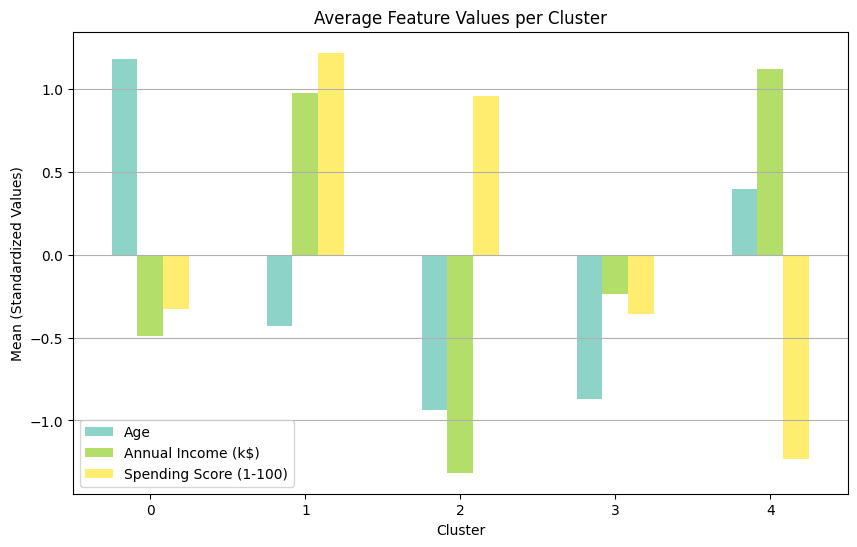

In [16]:
cluster_profile.plot(kind='bar', figsize=(10, 6), colormap='Set3')
plt.title('Average Feature Values per Cluster')
plt.ylabel('Mean (Standardized Values)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()